In [40]:
#Dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import requests 
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress

#Import the API Key
from api_keys import google_api

In [58]:
#Shopping Birks
base_url="https://serpapi.com/search"

params = {"engine": "google_shopping",
          "q": "Birkenstocks",
          "api_key": google_api}
# Run request
response= requests.get(base_url, params=params)
resp_data = response.json()
# Print the json (pretty printed)
#print(json.dumps(resp_data, indent=4, sort_keys=False))

In [3]:
resp_data["shopping_results"][0]["rating"]

4.7

In [4]:
sub = resp_data["shopping_results"]
# Convert to DataFrame
birk = pd.DataFrame(sub)

birk.head()

,position,title,link,product_link,product_id,serpapi_product_api,source,price,extracted_price,rating,...,delivery,store_rating,store_reviews,number_of_comparisons,comparison_link,serpapi_product_api_comparisons,extensions,badge,tag,alternative_price
0,1,Birkenstock Arizona Sandals Mocca,https://www.birkenstock.com/us/arizona-birko-f...,https://www.google.com/shopping/product/802308...,8023085328904509767,https://serpapi.com/search.json?device=desktop...,BIRKENSTOCK,$59.95,59.95,4.7,...,$4.95 delivery,4.4,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Birkenstock Black Arizona Sandals,https://www.ssense.com/en-us/men/product/birke...,https://www.google.com/shopping/product/155668...,15566894643699622971,https://serpapi.com/search.json?device=desktop...,ssense.com,$190.00,190.00,4.5,...,Free delivery & Free 30-day returns,4.4,1600.0,5+,https://www.google.com/shopping/product/155668...,https://serpapi.com/search.json?engine=google_...,[$300 minimum order],Trusted store,NaN,NaN
2,3,Birkenstock Brown Arizona Sandals,https://www.amazon.com/Birkenstock-Womens-Ariz...,https://www.google.com/shopping/product/131740...,13174056794770724349,https://serpapi.com/search.json?device=desktop...,Amazon.com - Seller,$99.00,99.00,4.7,...,Free delivery,NaN,NaN,10+,https://www.google.com/shopping/product/131740...,https://serpapi.com/search.json?engine=google_...,NaN,Trusted store,NaN,NaN
3,4,BIRKENSTOCK Sydney Birko-Flor Graceful Old Ros...,https://www.birkenstock.com/us/sydney-birko-fl...,https://www.google.com/shopping/product/1?gl=u...,15929910482451126381,https://serpapi.com/search.json?device=desktop...,BIRKENSTOCK,$59.97,59.97,NaN,...,$4.95 delivery,4.4,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Birkenstock Mocca Arizona Sandals,https://www.ebay.com/itm/266185116372?chn=ps&m...,https://www.google.com/shopping/product/756243...,756243027304708270,https://serpapi.com/search.json?device=desktop...,eBay - the-walking-style,$86.99,86.99,4.9,...,$14.99 delivery,NaN,NaN,10+,https://www.google.com/shopping/product/756243...,https://serpapi.com/search.json?engine=google_...,NaN,NaN,NaN,NaN


In [59]:
# Column renaming
birk= birk.rename(
    columns = {
        "title" : "Product name",
        "source": "Selling Source",
        "price": "Price ($)",
        "extracted_price": "Extracted Price",
        "rating": "Rating",
        "reviews": "Reviews",

    }
)


# Configure the final DataFrame
birk = birk[
    [
        "Product name", 
        "Selling Source",
        "Price ($)",
        "Extracted Price",
        "Rating",
        "Reviews",
    ]
]


In [6]:
 # Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
#sub2.to_csv("sub2.csv")

## Cleaning


In [7]:
birk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product name     60 non-null     object 
 1   Selling Source   60 non-null     object 
 2   Price ($)        60 non-null     object 
 3   Extracted Price  60 non-null     float64
 4   Rating           56 non-null     float64
 5   Reviews          56 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.9+ KB


In [8]:
birk["Reviews"].fillna(0,inplace=True)
birk["Rating"].fillna(0,inplace=True)
birk.Reviews=birk.Reviews.astype(int)
# sub2["Price ($)"]=sub2["Price ($)"].str.replace(",","")#if you need to remove commas 
birk["Price ($)"]=birk["Price ($)"].str.replace("$","").astype(float)

/var/folders/4y/bplz9gkx115983933b15hd8r0000gp/T/ipykernel_62052/3729839387.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  birk["Price ($)"]=birk["Price ($)"].str.replace("$","").astype(float)


In [9]:
birk["Price ($)"].mean()
birk["Price ($)"].median()
birk["Price ($)"].mode()

0    59.95
Name: Price ($), dtype: float64

In [10]:
birk.head()

,Product name,Selling Source,Price ($),Extracted Price,Rating,Reviews
0,Birkenstock Arizona Sandals Mocca,BIRKENSTOCK,59.95,59.95,4.7,151
1,Birkenstock Black Arizona Sandals,ssense.com,190.00,190.00,4.5,6992
2,Birkenstock Brown Arizona Sandals,Amazon.com - Seller,99.00,99.00,4.7,582
3,BIRKENSTOCK Sydney Birko-Flor Graceful Old Ros...,BIRKENSTOCK,59.97,59.97,0.0,0
4,Birkenstock Mocca Arizona Sandals,eBay - the-walking-style,86.99,86.99,4.9,346


In [11]:
birk.to_csv("data/birk_shop.csv")

In [12]:
df_rating=birk[["Selling Source","Rating"]].copy()
df_rating.set_index("Selling Source", inplace=True)
df_rating.head()

,Rating
Selling Source,
BIRKENSTOCK,4.7
ssense.com,4.5
Amazon.com - Seller,4.7
BIRKENSTOCK,0.0
eBay - the-walking-style,4.9


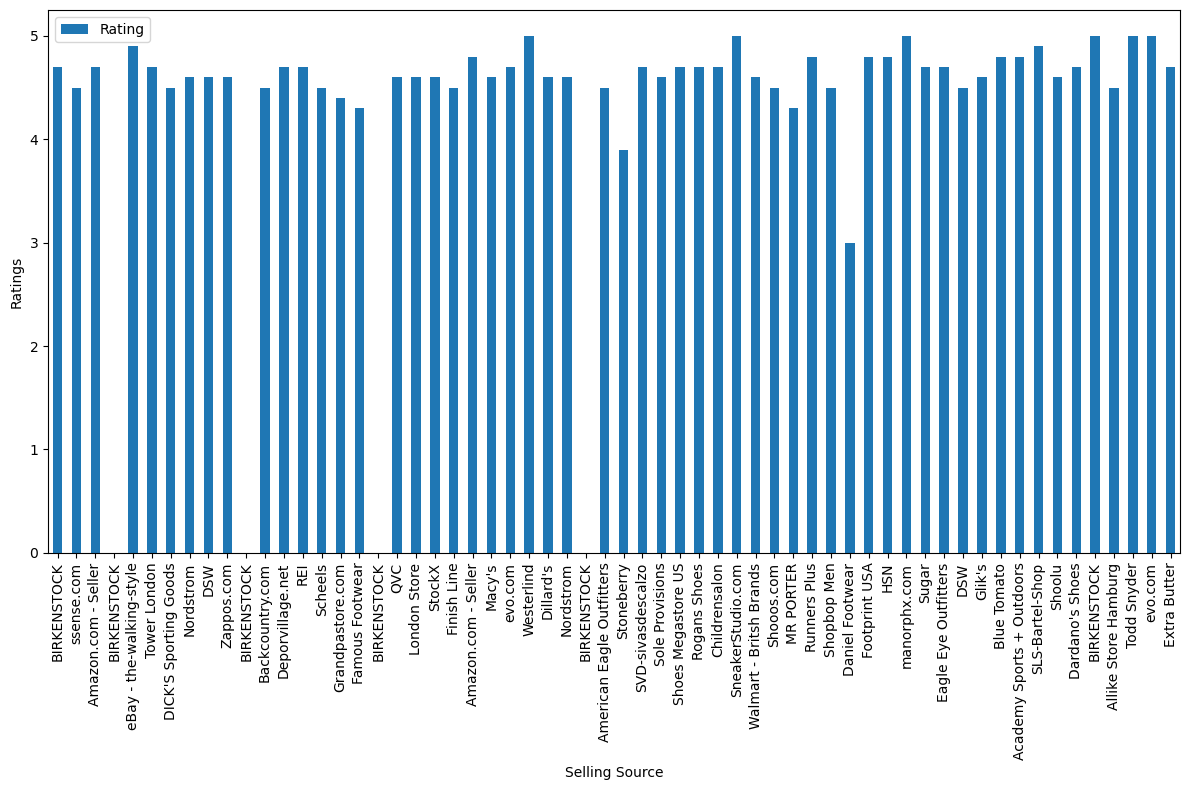

In [13]:
df_rating.plot(kind="bar",rot=90,figsize=(12,8))
plt.ylabel("Ratings")
plt.tight_layout()
plt.savefig("ratingplot.png")
plt.show()

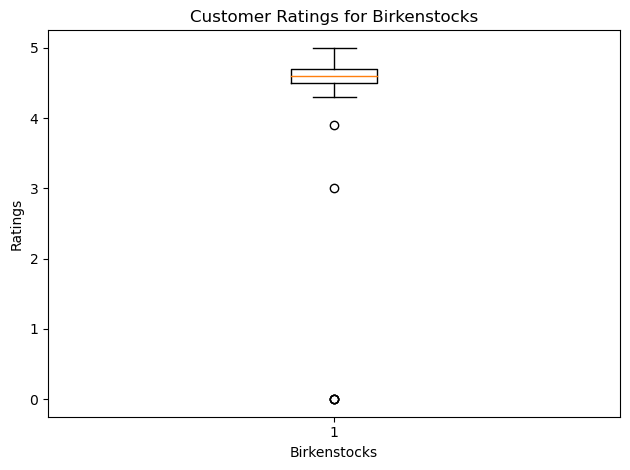

In [14]:
plt.boxplot(df_rating, 0)
plt.title("Customer Ratings for Birkenstocks")
plt.ylabel("Ratings")
plt.xlabel("Birkenstocks")
plt.tight_layout()
plt.savefig("birkratingboxplot.png")
plt.show()

In [17]:
df_reviews=birk[["Selling Source","Reviews"]].copy()
df_reviews.set_index("Selling Source", inplace=True)
df_reviews.head()

,Reviews
Selling Source,
BIRKENSTOCK,151
ssense.com,6992
Amazon.com - Seller,582
BIRKENSTOCK,0
eBay - the-walking-style,346


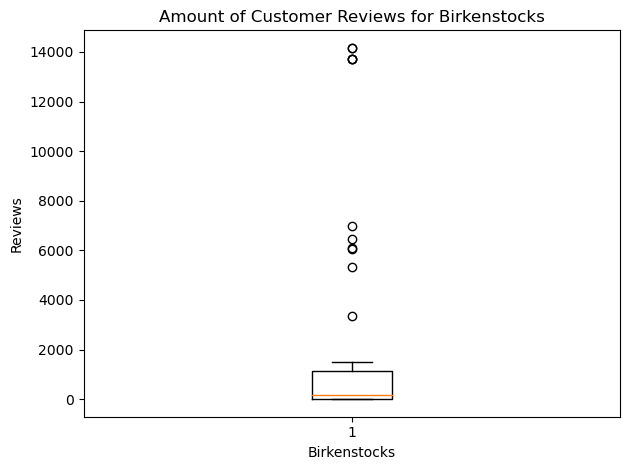

In [18]:
plt.boxplot(df_reviews, 0)
plt.title("Amount of Customer Reviews for Birkenstocks")
plt.ylabel("Reviews")
plt.xlabel("Birkenstocks")
plt.tight_layout()
plt.savefig("birkreviewsboxplot.png")
plt.show()

In [19]:
df_price=birk[["Selling Source","Price ($)"]].copy()
df_price.set_index("Selling Source", inplace=True)
df_price.head()

,Price ($)
Selling Source,
BIRKENSTOCK,59.95
ssense.com,190.00
Amazon.com - Seller,99.00
BIRKENSTOCK,59.97
eBay - the-walking-style,86.99


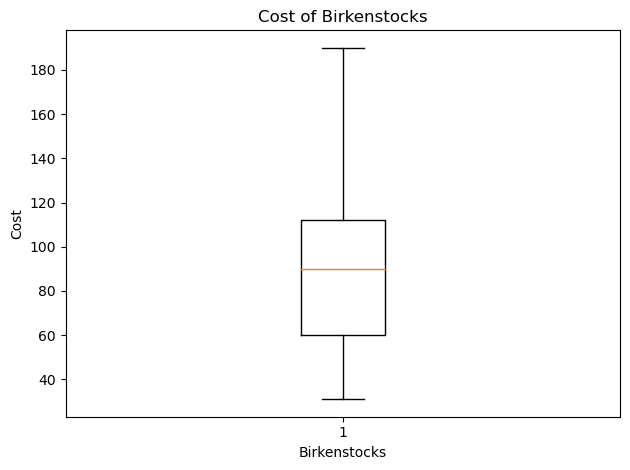

In [20]:
plt.boxplot(df_price, 0)
plt.title("Cost of Birkenstocks")
plt.ylabel("Cost")
plt.xlabel("Birkenstocks")
plt.tight_layout()
plt.savefig("birkcostboxplot.png")
plt.show()

In [60]:
#Shopping Crocs
base_url="https://serpapi.com/search"

params = {"engine": "google_shopping",
          "q": "Crocs",
          "api_key": google_api}
# Run request
response= requests.get(base_url, params=params)
resp_data = response.json()
# Print the json (pretty printed)
print(json.dumps(resp_data, indent=4, sort_keys=False))
sub= resp_data["shopping_results"]
# Convert to DataFrame
croc = pd.DataFrame(sub)


{
    "search_metadata": {
        "id": "64330d261988e50a762a44ec",
        "status": "Success",
        "json_endpoint": "https://serpapi.com/searches/c249b6cda65924b5/64330d261988e50a762a44ec.json",
        "created_at": "2023-04-09 19:08:22 UTC",
        "processed_at": "2023-04-09 19:08:22 UTC",
        "google_shopping_url": "https://www.google.com/search?tbm=shop&q=Crocs&hl=en&gl=us",
        "raw_html_file": "https://serpapi.com/searches/c249b6cda65924b5/64330d261988e50a762a44ec.html",
        "prettify_html_file": "https://serpapi.com/searches/c249b6cda65924b5/64330d261988e50a762a44ec.prettify",
        "total_time_taken": 2.89
    },
    "search_parameters": {
        "engine": "google_shopping",
        "q": "Crocs",
        "google_domain": "google.com",
        "hl": "en",
        "gl": "us",
        "device": "desktop"
    },
    "search_information": {
        "shopping_results_state": "Results for exact spelling",
        "error_message": "Google has returned malformed 

In [61]:
# Column renaming
croc = croc.rename(
    columns = {
        "title" : "Product name",
        "source": "Selling Source",
        "price": "Price ($)",
        "extracted_price": "Extracted Price",
        "rating": "Rating",
        "reviews": "Reviews",

    }
)


# Configure the final DataFrame
croc = croc[
    [
        "Product name", 
        "Selling Source",
        "Price ($)",
        "Extracted Price",
        "Rating",
        "Reviews",
    ]
]



In [23]:
croc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product name     60 non-null     object 
 1   Selling Source   60 non-null     object 
 2   Price ($)        60 non-null     object 
 3   Extracted Price  60 non-null     float64
 4   Rating           54 non-null     float64
 5   Reviews          54 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.9+ KB


In [25]:
croc["Reviews"].fillna(0,inplace=True)
croc["Rating"].fillna(0,inplace=True)
croc.Reviews=croc.Reviews.astype(int)
# sub2["Price ($)"]=sub2["Price ($)"].str.replace(",","")#if you need to remove commas 
croc["Price ($)"]=croc["Price ($)"].str.replace("$","").astype(float)

/var/folders/4y/bplz9gkx115983933b15hd8r0000gp/T/ipykernel_62052/1210329731.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  croc["Price ($)"]=croc["Price ($)"].str.replace("$","").astype(float)


In [26]:
df_rating=croc[["Selling Source","Rating"]].copy()
df_rating.set_index("Selling Source", inplace=True)
df_rating.head()

,Rating
Selling Source,
Amazon.com,4.6
Foot Locker,3.7
DICK'S Sporting Goods,4.8
crocs.com,4.8
DSW,4.6


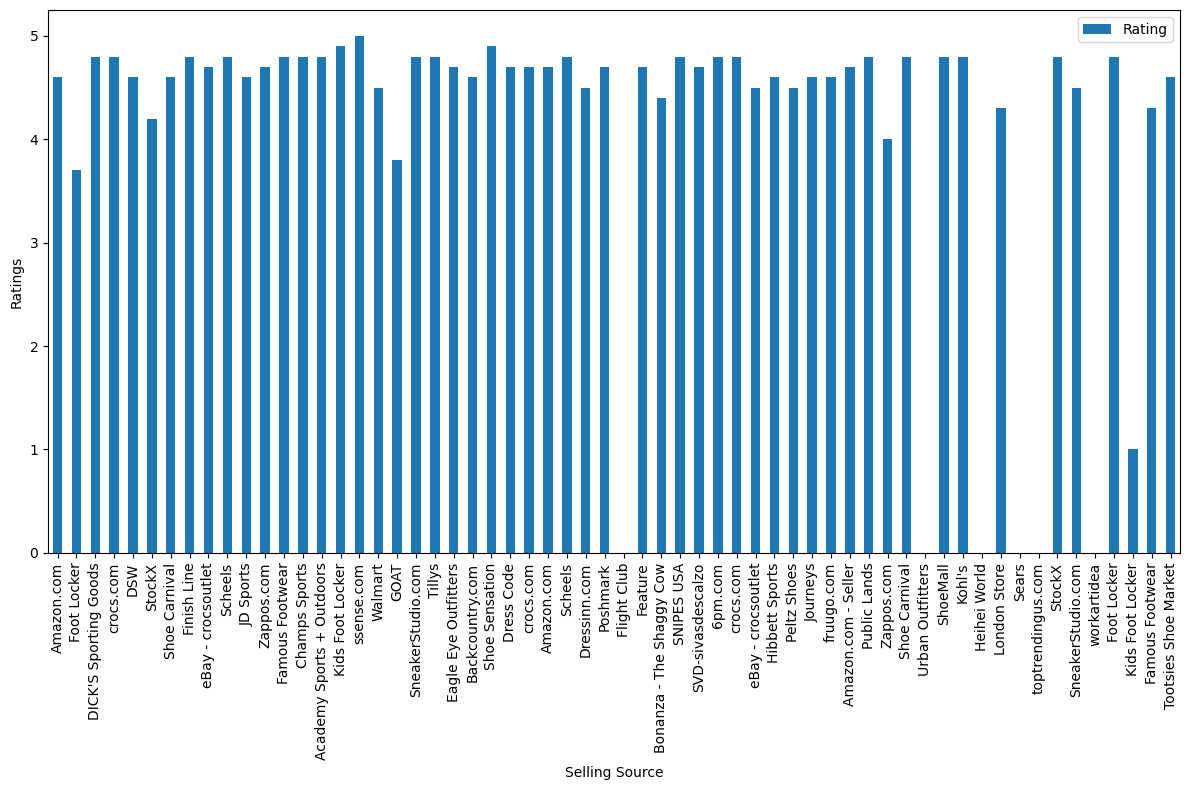

In [27]:
df_rating.plot(kind="bar",rot=90,figsize=(12,8))
plt.ylabel("Ratings")
plt.tight_layout()
plt.savefig("crocratingplot.png")
plt.show()

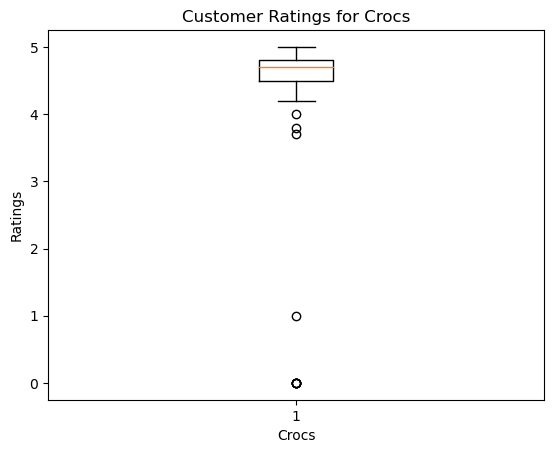

In [28]:
plt.boxplot(df_rating,0)
plt.title("Customer Ratings for Crocs")
plt.ylabel("Ratings")
plt.xlabel("Crocs")
plt.savefig("crocratingboxplot.png")
plt.show()

In [29]:
df_reviews=croc[["Selling Source","Reviews"]].copy()
df_reviews.set_index("Selling Source", inplace=True)
df_reviews.head()

,Reviews
Selling Source,
Amazon.com,13555
Foot Locker,3
DICK'S Sporting Goods,1723
crocs.com,6424
DSW,15071


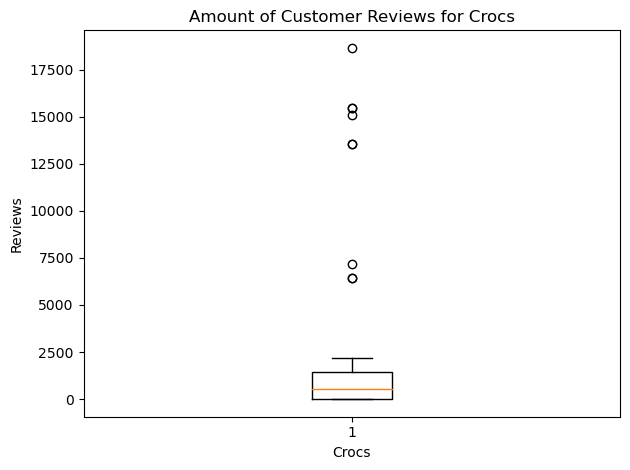

In [30]:
plt.boxplot(df_reviews, 0)
plt.title("Amount of Customer Reviews for Crocs")
plt.ylabel("Reviews")
plt.xlabel("Crocs")
plt.tight_layout()
plt.savefig("crocreviewsboxplot.png")
plt.show()

In [31]:
df_price=croc[["Selling Source","Price ($)"]].copy()
df_price.set_index("Selling Source", inplace=True)
df_price.head()

,Price ($)
Selling Source,
Amazon.com,25.25
Foot Locker,70.00
DICK'S Sporting Goods,26.24
crocs.com,49.99
DSW,49.99


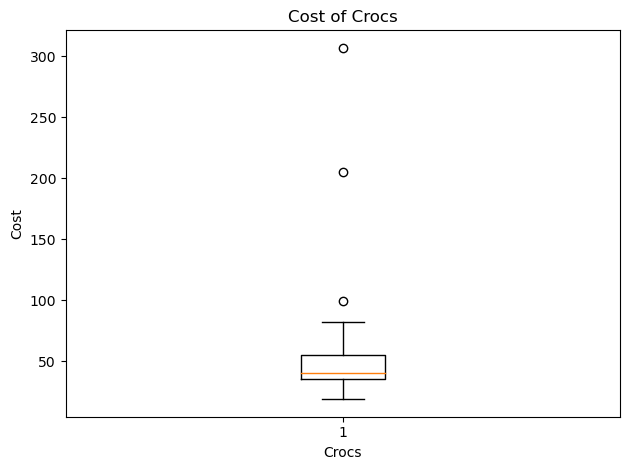

In [32]:
plt.boxplot(df_price, 0)
plt.title("Cost of Crocs")
plt.ylabel("Cost")
plt.xlabel("Crocs")
plt.tight_layout()
plt.savefig("croccostboxplot.png")
plt.show()

## Merged Data

In [33]:
#Merge the two Data Frames together 
croc_birk_df=pd.merge(birk,croc,on='Selling Source')
croc_birk_df.tail()

,Product name_x,Selling Source,Price ($)_x,Extracted Price_x,Rating_x,Reviews_x,Product name_y,Price ($)_y,Extracted Price_y,Rating_y,Reviews_y
17,Birkenstock Arizona Birko Flor Black,SVD-sivasdescalzo,65.00,65.00,4.7,13725,Crocs Classic Clog K Red,19.25,19.25,4.7,18651
18,Birkenstock Kids Arizona Birko-Flor White Two-...,SneakerStudio.com,50.00,50.00,5.0,1,Crocs Ice Blue Kids' Classic Clog Shoes,22.00,22.00,4.8,1723
19,Birkenstock Kids Arizona Birko-Flor White Two-...,SneakerStudio.com,50.00,50.00,5.0,1,Crocs Unisex-Adult Men's and Women's Classic S...,30.00,30.00,4.5,873
20,Birkenstock Women's Mayari (39 Graceful Taupe ...,Eagle Eye Outfitters,99.95,99.95,4.7,1116,Crocs Kids Classic Clog - Neon Watermelon,39.95,39.95,4.7,69
21,"Birkenstock Women's Arizona Sandals, Black, 41",Academy Sports + Outdoors,109.99,109.99,4.8,1251,"Crocs Classic Clog Lavender, 2",49.99,49.99,4.8,126


In [34]:
#Save the Data Frame as a CSV File
croc_birk_df.to_csv("data/croc_birk_merged.csv")


In [35]:
#Remove Extracted Price 
croc_birk_df.drop('Extracted Price_x',axis=1, inplace=True)
croc_birk_df.drop('Extracted Price_y',axis=1, inplace=True)


In [36]:
# Column renaming
croc_birk_df = croc_birk_df.rename(
    columns = {
        "Product name_x" : "Birkenstock Products",
        "Selling Source" : "Selling Source",
        "Price ($)_x": "Birkenstock Price",
        "Rating_x": "Birkenstock Ratings",
        "Reviews_x":"Birkenstock Reviews",
        "Product name_y" : "Croc Products",
        "Selling Source" : "Selling Source",
        "Price ($)_y": "Crocs Price",
        "Rating_y": "Crocs Ratings",
        "Reviews_y":"Crocs Reviews",})
croc_birk_df.head()

,Birkenstock Products,Selling Source,Birkenstock Price,Birkenstock Ratings,Birkenstock Reviews,Croc Products,Crocs Price,Crocs Ratings,Crocs Reviews
0,Birkenstock Black Arizona Sandals,ssense.com,190.00,4.5,6992,Crocs Kids Classic Butterfly Clog - White/Multi,45.00,5.0,5
1,Birkenstock Brown Arizona Sandals,Amazon.com - Seller,99.00,4.7,582,Crocs Fun Lab Cars (Flame) Kids,29.99,4.7,546
2,Birkenstock Arizona Birko-Flor Sandal,Amazon.com - Seller,80.41,4.8,152,Crocs Fun Lab Cars (Flame) Kids,29.99,4.7,546
3,"Birkenstock Men's Arizona Eva Sandals, Multi/B...",DICK'S Sporting Goods,30.97,4.5,125,Crocs Classic Clog 204536 Pink,26.24,4.8,1723
4,"Birkenstock Women's Arizona Slide Sandal, Moch...",DSW,109.99,4.6,1464,Crocs Classic Clog - Black,49.99,4.6,15071


In [37]:
#Save the Data Frame as a CSV File
croc_birk_df.to_csv("data/croc_birk_df_cleaned.csv")

In [51]:
#data format
croc_birk_df.dtypes

Birkenstock Products     object
Selling Source           object
Birkenstock Price       float64
Birkenstock Ratings     float64
Birkenstock Reviews       int64
Croc Products            object
Crocs Price             float64
Crocs Ratings           float64
Crocs Reviews             int64
dtype: object

In [57]:
#Convert the floats to ints
croc_birk_df['Birkenstock Price'] = croc_birk_df['Birkenstock Price'].apply(np.int64)
croc_birk_df['Crocs Price'] = croc_birk_df['Crocs Price'].apply(np.int64)
croc_birk_df['Birkenstock Ratings'] = croc_birk_df['Birkenstock Ratings'].apply(np.int64)
croc_birk_df['Crocs Ratings'] = croc_birk_df['Crocs Ratings'].apply(np.int64)
display(croc_birk_df.dtypes)

Birkenstock Products    object
Selling Source          object
Birkenstock Price        int64
Birkenstock Ratings      int64
Birkenstock Reviews      int64
Croc Products           object
Crocs Price              int64
Crocs Ratings            int64
Crocs Reviews            int64
dtype: object

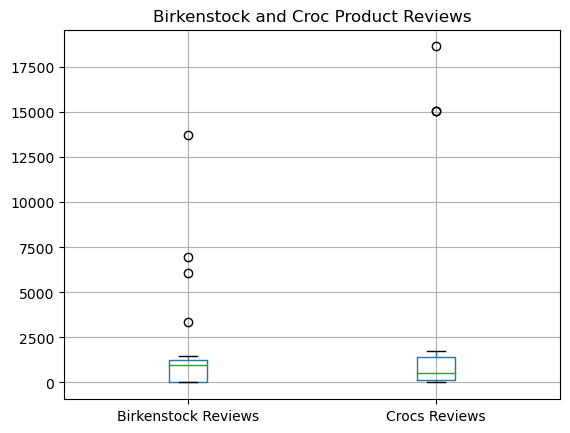

In [38]:
#Create a boxplot to show the comparison of Reviews for Crocs vs. Birks
bc_review=croc_birk_df.boxplot(column = ['Birkenstock Reviews', 'Crocs Reviews']) 
plt.title("Birkenstock and Croc Product Reviews")
bc_review.plot() 
plt.savefig("data/reviews.png")


The r-squared is: 0.005717256053405945


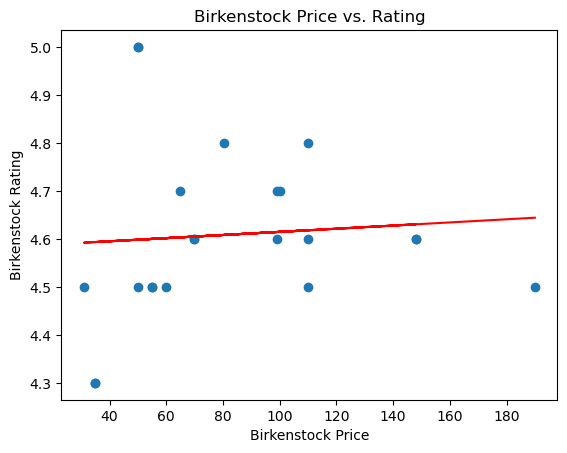

In [41]:
# Showing Ratings vs Price for Birk
x_values = croc_birk_df['Birkenstock Price']
y_values = croc_birk_df['Birkenstock Ratings']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Birkenstock Price')
plt.ylabel('Birkenstock Rating')
plt.title("Birkenstock Price vs. Rating")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("data/birk_rating_price.png")
plt.show()

The r-squared is: 0.11893893010182048


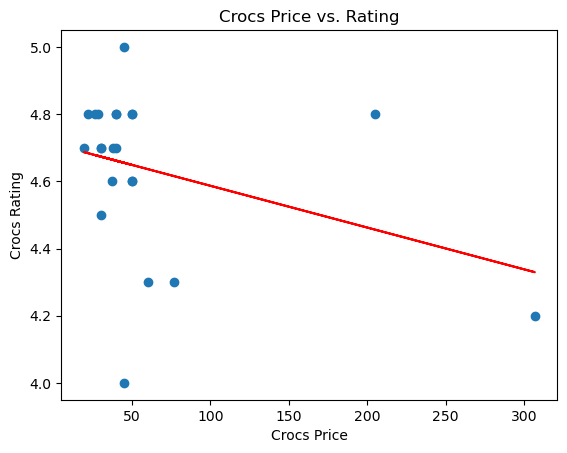

In [42]:
# Showing Ratings vs Price for Croc
x_values = croc_birk_df['Crocs Price']
y_values = croc_birk_df['Crocs Ratings']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Crocs Price')
plt.ylabel('Crocs Rating')
plt.title("Crocs Price vs. Rating")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("data/croc_rating_price.png")
plt.show()

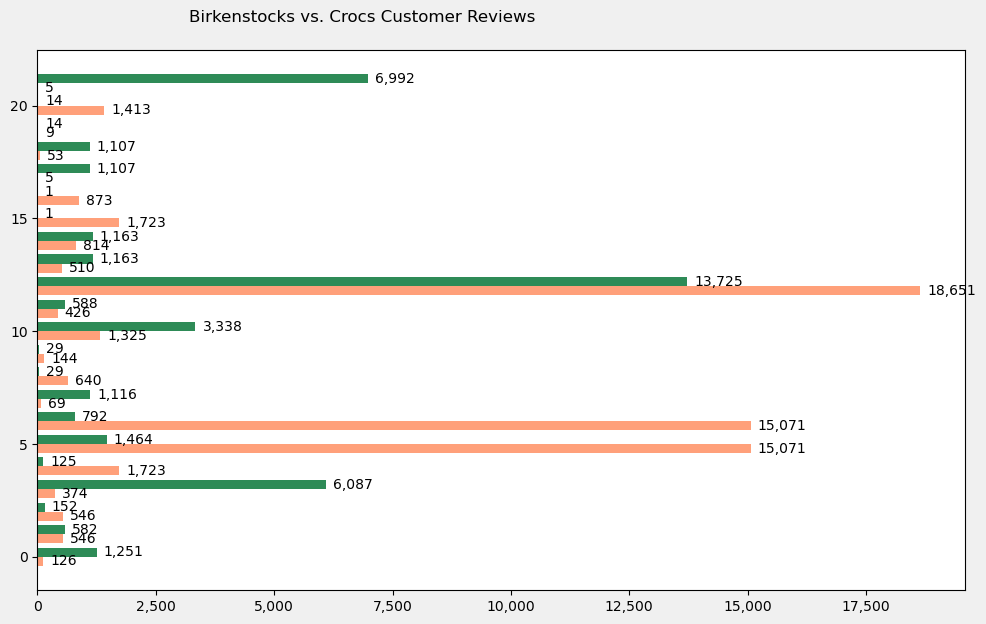

In [74]:
import matplotlib as mpl

#Selling Source vs. Reveiw for Birk and Crocs
#Create bar width
width=0.4
#Set up the first bar 
first_bar=croc_birk_df['Birkenstock Reviews']
first_bar_label="Birkenstock Reviews"
first_bar_color="seagreen"
#Set up the second bar
second_bar=croc_birk_df['Crocs Reviews']
second_bar_label="Crocs Reviews"
second_bar_color="lightsalmon"
#Set up the layout
croc_birk_df.sort_values(by='Selling Source', inplace=True, ascending=True)
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()
labels=croc_birk_df["Selling Source"]
plot_title= "Birkenstocks vs. Crocs Customer Reviews"
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

        
# Set title
title = plt.title(plot_title, pad=20)
title.set_position([.35, 1])
            
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)


In [80]:
croc_birk_df.reset_index()

,index,Birkenstock Products,Selling Source,Birkenstock Price,Birkenstock Ratings,Birkenstock Reviews,Croc Products,Crocs Price,Crocs Ratings,Crocs Reviews
0,21,"Birkenstock Women's Arizona Sandals, Black, 41",Academy Sports + Outdoors,109,4,1251,"Crocs Classic Clog Lavender, 2",49,4,126
1,1,Birkenstock Brown Arizona Sandals,Amazon.com - Seller,99,4,582,Crocs Fun Lab Cars (Flame) Kids,29,4,546
2,2,Birkenstock Arizona Birko-Flor Sandal,Amazon.com - Seller,80,4,152,Crocs Fun Lab Cars (Flame) Kids,29,4,546
3,8,Birkenstock Arizona Toe Loop Sandal in Electri...,Backcountry.com,59,4,6087,"Crocs Classic Lined Clog - Kids' White/Grey, 3.0",37,4,374
4,3,"Birkenstock Men's Arizona Eva Sandals, Multi/B...",DICK'S Sporting Goods,30,4,125,Crocs Classic Clog 204536 Pink,26,4,1723
5,4,"Birkenstock Women's Arizona Slide Sandal, Moch...",DSW,109,4,1464,Crocs Classic Clog - Black,49,4,15071
6,5,Birkenstock Arizona Slide Sandal | Women's | M...,DSW,109,4,792,Crocs Classic Clog - Black,49,4,15071
7,20,Birkenstock Women's Mayari (39 Graceful Taupe ...,Eagle Eye Outfitters,99,4,1116,Crocs Kids Classic Clog - Neon Watermelon,39,4,69
8,11,Birkenstock Kids Arizona Eva - Black 29,Famous Footwear,34,4,29,Crocs Classic Marbled Clog White/Black,49,4,640
9,12,Birkenstock Kids Arizona Eva - Black 29,Famous Footwear,34,4,29,Crocs Classic Clog Margaritaville,59,4,144


Text(0, 0.5, 'Number of Reviews')

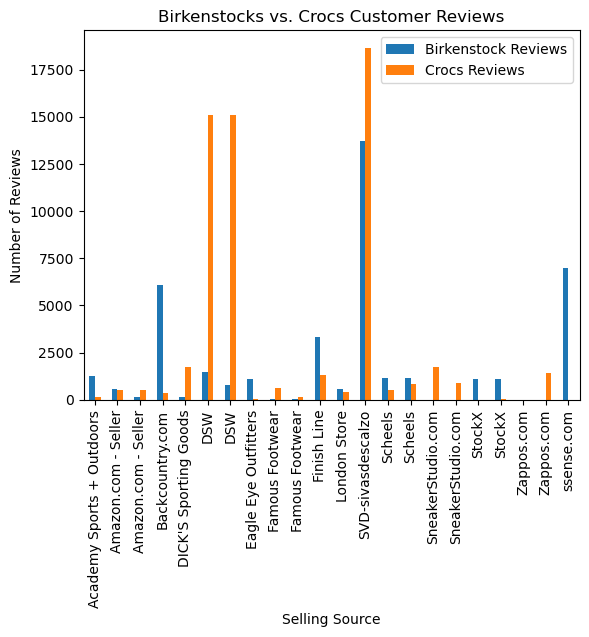

In [82]:
croc_birk_df.reset_index().plot(
    x="Selling Source", y=["Birkenstock Reviews", "Crocs Reviews"], kind="bar"
)
plt.title("Birkenstocks vs. Crocs Customer Reviews")
plt.xlabel("Selling Source")
plt.ylabel("Number of Reviews")

In [ ]:
#Selling Source vs. Price for Birk and Crocs

In [62]:
#Selling Source vs Rating for Birk and Crocs